In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
df=pd.read_csv('winequality-red.csv')

In [2]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.quality.nunique()

6

In [6]:
df.shape

(1599, 12)

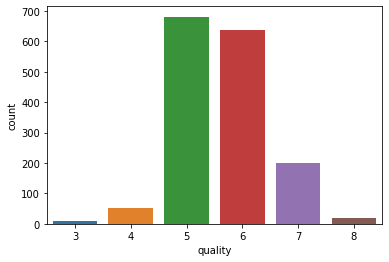

In [7]:
sb.countplot(df['quality'])

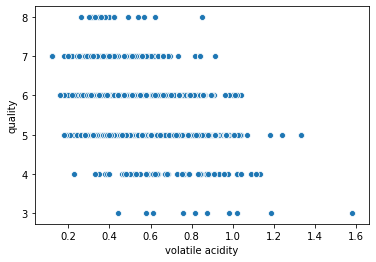

In [8]:
sb.scatterplot(x=df['volatile acidity'],y=df['quality'])

In [9]:
from sklearn.preprocessing import LabelEncoder
bins=(2,6.5,8)
names=['good','bad']
df['quality']=pd.cut(df['quality'],bins=bins,labels=names)

In [10]:
df['quality']

0       good
1       good
2       good
3       good
4       good
        ... 
1594    good
1595    good
1596    good
1597    good
1598    good
Name: quality, Length: 1599, dtype: category
Categories (2, object): [good < bad]

In [11]:
df.quality.unique()

[good, bad]
Categories (2, object): [good < bad]

In [12]:
df['quality']=df['quality'].apply(lambda x:1 if x=='good' else 0 )

In [13]:
X=df.drop('quality',axis=1)
y=df['quality']

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =101)



In [15]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [17]:
svm = SVC(C=12)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.896875

In [18]:
rf = RandomForestClassifier(n_estimators=60)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.903125

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.853125